<a href="https://colab.research.google.com/github/KapilKhanal/CS131/blob/master/Ross_Chandler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive # this will be our driver
drive.mount('/gdrive')
root = '/gdrive/My Drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/CNN_Friends")

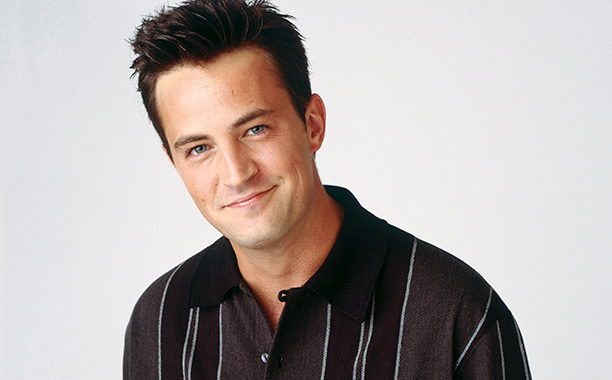

In [3]:
from IPython.display import Image
Image("000003.jpg")

In [5]:
from __future__ import print_function, division

import numpy as np
import random
import os
import glob
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
!pip install sklearn
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

from scipy.misc import imresize, imsave

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt
from keras import applications
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [0]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# make 32 feature detectors with a size of 3x3
# choose the input-image's format to be 64x64 with 3 channels
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation="relu"))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="sigmoid", units=1))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [8]:
# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

# augment the data that we have
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# prepare training data
training_data = train_datagen.flow_from_directory('./train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# prepare test data
test_data = test_datagen.flow_from_directory('./test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

# finally start computation
# to improve the model accuracy you can increase the number of steps_per_epoch to e.g. 8000
# increase the number of epochs to 5-25
# increase the validation steps
# this parametters allow for the model to optimize

Found 135 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [9]:
# finally start computation
# to improve the model accuracy you can increase the number of steps_per_epoch to e.g. 8000
# increase the number of epochs to 5-25
# increase the validation steps
# this parametters allow for the model to optimize

classifier.fit_generator(training_data,
                         steps_per_epoch = (8000 / 32),
                         epochs = 5,
                         validation_data = test_data,
                         validation_steps = 200)

Epoch 1/5
250/250 [==============================] - 189s 755ms/step - loss: 0.3217 - acc: 0.8509 - val_loss: 1.6763 - val_acc: 0.5758
Epoch 2/5
250/250 [==============================] - 134s 534ms/step - loss: 0.0666 - acc: 0.9819 - val_loss: 2.1852 - val_acc: 0.6364
Epoch 3/5
250/250 [==============================] - 134s 537ms/step - loss: 0.0093 - acc: 0.9986 - val_loss: 2.4464 - val_acc: 0.6061
Epoch 4/5
250/250 [==============================] - 134s 536ms/step - loss: 0.0226 - acc: 0.9937 - val_loss: 2.9871 - val_acc: 0.5758
Epoch 5/5
250/250 [==============================] - 134s 535ms/step - loss: 0.0278 - acc: 0.9905 - val_loss: 2.4835 - val_acc: 0.6061


In [11]:


# to make predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./matthew-perry.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# training_set.class_indices
if result[0][0] == 1:
    prediction = 'Ross'
else:
    prediction = 'Chandler'
    
print(result)
print(prediction)

[[0.]]
Chandler


In [12]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

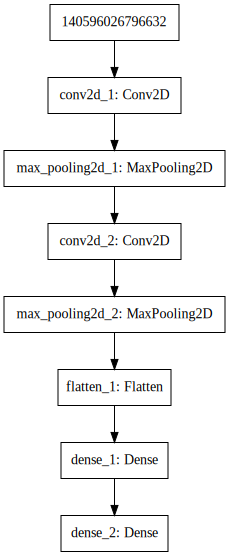

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

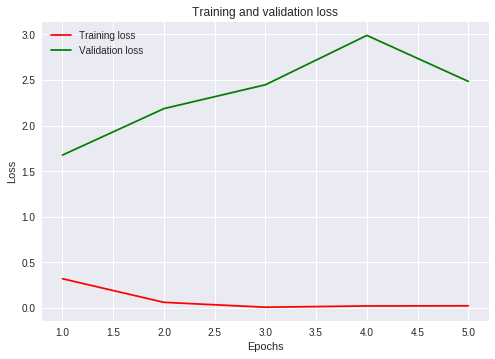

In [14]:
import matplotlib.pyplot as plt
loss = classifier.history.history['loss']
val_loss = classifier.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
classifier.save_weights('first_try.h5')

In [16]:
img_width, img_height = 64, 64
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
for layer in model.layers[:5]:
    layer.trainable = False

80142336/80134624 [==============================] - 3s 0us/step


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [0]:
from keras import models
from keras import layers
model_final = models.Sequential()
model_final.add(model)
model_final.add(layers.Flatten())
model_final.add(layers.Dense(256, activation='relu'))
model_final.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model_final.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


In [23]:
history = model_final.fit_generator(
      training_data,
      steps_per_epoch=100,
      epochs=30,
      validation_data=test_data,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 55s 552ms/step - loss: 0.3495 - acc: 0.8277 - val_loss: 1.5785 - val_acc: 0.4242
Epoch 2/30
100/100 [==============================] - 50s 503ms/step - loss: 0.0704 - acc: 0.9763 - val_loss: 1.2120 - val_acc: 0.6655
Epoch 3/30
100/100 [==============================] - 50s 501ms/step - loss: 0.0518 - acc: 0.9919 - val_loss: 1.4546 - val_acc: 0.6970
Epoch 4/30
100/100 [==============================] - 50s 500ms/step - loss: 0.0426 - acc: 0.9918 - val_loss: 1.4604 - val_acc: 0.5758
Epoch 5/30
100/100 [==============================] - 50s 502ms/step - loss: 0.0077 - acc: 0.9964 - val_loss: 2.0424 - val_acc: 0.6982
Epoch 6/30
100/100 [==============================] - 50s 496ms/step - loss: 0.0517 - acc: 0.9919 - val_loss: 1.8049 - val_acc: 0.6655
Epoch 7/30
100/100 [==============================] - 50s 501ms/step - loss: 0.0503 - acc: 0.9923 - val_loss: 1.8774 - val_acc: 0.5745
Epoch 8/30
100/100 [==============================] - 5

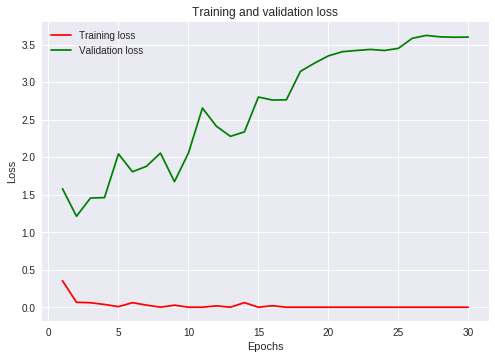

In [25]:
import matplotlib.pyplot as plt
loss = model_final.history.history['loss']
val_loss = model_final.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()